
**Vizualização de dados por atributo**
---



# Exploração de atributos e contagem de respostas

Carrega um `.csv`, **conta a quantidade de respostas distintas por atributo** e **inclui os em branco** (ausentes ou apenas espaços).
Gera **gráficos** por coluna:
- Colunas **categóricas** → barras
- Colunas **numéricas** → histograma + contagem de ausentes


In [ ]:
CSV_PATH = "/content/PNS_idosos.csv"  # use o nome do seu arquivo (ou caminho absoluto)
MAX_CATS_PLOT = 30
NUM_BINS = 30


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 200)


**Ler CSV**

In [ ]:
from pathlib import Path

def load_csv_smart(path):
    path = Path(path)
    if not path.exists():
        alt = Path("/mnt/data") / path.name
        if alt.exists():
            path = alt
        else:
            raise FileNotFoundError(f"Arquivo não encontrado: {path}")

    encodings_to_try = ["utf-8", "latin-1", "cp1252"]
    seps_to_try = [",", ";", "\t", None]
    last_err = None
    for enc in encodings_to_try:
        for sep in seps_to_try:
            try:
                if sep is None:
                    df = pd.read_csv(path, engine="python", sep=None, low_memory=False, encoding=enc)
                else:
                    df = pd.read_csv(path, sep=sep, low_memory=False, encoding=enc)
                return df, str(path), enc, (sep if sep is not None else "inferido")
            except Exception as e:
                last_err = e
                continue
    raise last_err

df, real_path, used_enc, used_sep = load_csv_smart(CSV_PATH)
print(f"Lido: {real_path}\nEncoding: {used_enc} | Separador: {used_sep}\nFormato: {df.shape[0]} linhas x {df.shape[1]} colunas")
df.head()


Lido: /content/PNS_idosos.csv
Encoding: utf-8 | Separador: ,
Formato: 21428 linhas x 64 colunas


,C006,C008,C009,C01001,C011,D001,E017,E019,G033,G048,G059,G072,I00101,I00102,K01901,K03401,K04302,M005010,N010,N011,N012,N013,N015,N016,N017,N018,P00104,P00404,P006,P01101,P013,P015,P018,P02501,P02602,P02801,P04501,P050,P05402,Q00201,Q03001,Q060,Q06306,Q092,Q09301,Q11006,V001,V00201,V00202,V00203,V00204,V00205,V01402,V01403,V01404,V01405,V02701,V02702,V02801,V02802,Y008,VDD004A,VDE001,VDF003
0,Homem,81,Parda,Não,Solteiro(a),Sim,NaN,NaN,Sim,Não,Sim,Não,Não,Não,Sim,Sim,2.0,NaN,Quase todos dias,Nenhum dia,Nenhum dia,Nenhum dia,Nenhum dia,Nenhum dia,Nenhum dia,Nenhum dia,81.0,174.0,1.0,7.0,7.0,0.0,1.0,5.0,0.0,NaN,De uma hora a menos de duas horas,Não fumo atualmente,NaN,Sim,Não,Não,Não,Não,NaN,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Recusou-se a responder,Fundamental incompleto ou equivalente,Pessoas fora da força de trabalho,998.0
1,Homem,81,Parda,Não,Divorciado(a) ou desquitado(a) ou separado(a) ...,Sim,NaN,NaN,Não,Não,Não,Não,Não,Não,NaN,Não,3.0,NaN,Nenhum dia,Nenhum dia,Nenhum dia,Nenhum dia,Nenhum dia,Nenhum dia,Nenhum dia,Nenhum dia,75.0,162.0,2.0,3.0,0.0,2.0,3.0,0.0,0.0,NaN,Não assiste televisão,Não fumo atualmente,NaN,Sim,Sim,Não,Não,Não,NaN,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Heterosexual,Fundamental incompleto ou equivalente,Pessoas fora da força de trabalho,1398.0
2,Mulher,66,Parda,Não,Viúvo(a),Sim,NaN,NaN,Sim,Não,Não,Não,Não,Sim,NaN,NaN,NaN,NaN,Nenhum dia,Nenhum dia,Nenhum dia,Nenhum dia,Nenhum dia,Nenhum dia,Nenhum dia,Nenhum dia,68.0,160.0,1.0,1.0,1.0,3.0,4.0,0.0,0.0,NaN,Não assiste televisão,Não fumo atualmente,NaN,Não,Não,Não,Não,Não,NaN,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Sim,Heterosexual,Superior completo,Pessoas fora da força de trabalho,6298.0
3,Homem,77,Parda,Sim,Casado(a),Sim,NaN,NaN,Sim,Não,Não,Não,Não,Sim,NaN,NaN,NaN,NaN,Nenhum dia,Menos da metade dos dias,Nenhum dia,Nenhum dia,Nenhum dia,Nenhum dia,Nenhum dia,Nenhum dia,68.0,169.0,7.0,5.0,0.0,2.0,7.0,7.0,0.0,NaN,De três horas a menos de seis horas,Não fumo atualmente,NaN,Não,Não,Não,Não,Não,NaN,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Heterosexual,Fundamental incompleto ou equivalente,Pessoas fora da força de trabalho,899.0
4,Mulher,65,Parda,Sim,Casado(a),Sim,30.0,NaN,Sim,Não,Não,Não,Não,Não,NaN,NaN,1.0,Não,Nenhum dia,Nenhum dia,Nenhum dia,Nenhum dia,Nenhum dia,Menos da metade dos dias,Nenhum dia,Nenhum dia,65.0,150.0,0.0,2.0,4.0,2.0,5.0,0.0,0.0,NaN,De uma hora a menos de duas horas,Não fumo atualmente,NaN,Sim,Não,Não,Não,Não,NaN,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Heterosexual,Médio completo ou equivalente,Pessoas na força de trabalho,733.0


**Arquivo em TXT**

In [24]:
def summary_by_column(df_input: pd.DataFrame) -> pd.DataFrame:
    rows = []
    n_total = len(df_input)
    for col in df_input.columns:
        s = df_input[col]
        n_missing = s.isna().sum()
        nunique_nonnull = s.dropna().nunique()
        dtype = str(s.dtype)
        vc = s.fillna("Em branco").value_counts(dropna=False).head(5)
        top = "; ".join([f"{idx}: {cnt}" for idx, cnt in vc.items()])
        rows.append({
            "column": col,
            "Faltante": n_missing,
            "Respostas_Possiveis": nunique_nonnull,
            "Maiores_Frequencias": top
        })
    out = pd.DataFrame(rows)
    return out.sort_values(by=["Faltante", "Respostas_Possiveis"], ascending=[False, True]).reset_index(drop=True)

summary = summary_by_column(df_norm)
summary
from pathlib import Path
out_dir = Path("out")
out_dir.mkdir(exist_ok=True)

txt_path = out_dir / "resumo_colunas.txt"
total = 21428

with open(txt_path, "w", encoding="utf-8") as f:
    f.write("Resumo por coluna\n")
    f.write(f"Total de linhas: {total}\n\n")
    for _, row in summary.iterrows():
        col = str(row["column"])
        n_missing = int(row["Faltante"])
        nunique_nonnull = int(row["Respostas_Possiveis"])
        top = str(row["Maiores_Frequencias"])
        miss_pct = (n_missing / total * 100.0) if total else 0.0

        f.write(f"**{col}**\n")
        f.write(f"  • ausentes: {n_missing} ({miss_pct:.1f}%)\n")
        f.write(f"  • Respostas_Possiveis : {nunique_nonnull}\n")
        f.write(f"  • Maiores_Frequencia: {top}\n\n")

**Graficos por atributo**

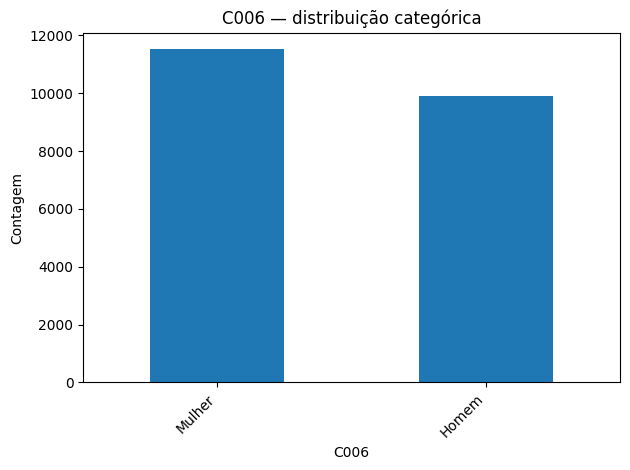

/tmp/ipython-input-2003943108.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  pd.api.types.is_categorical_dtype(s) or


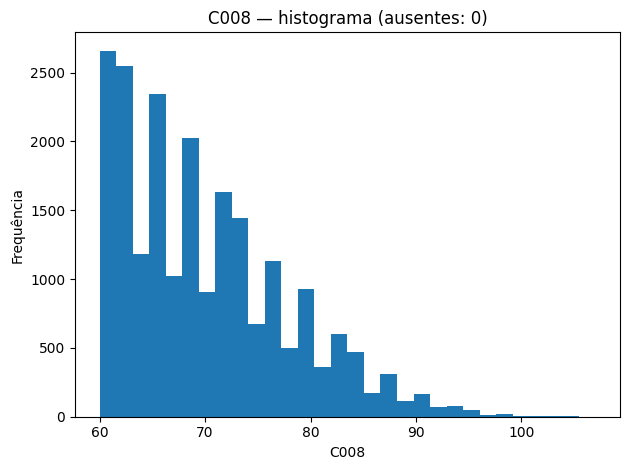

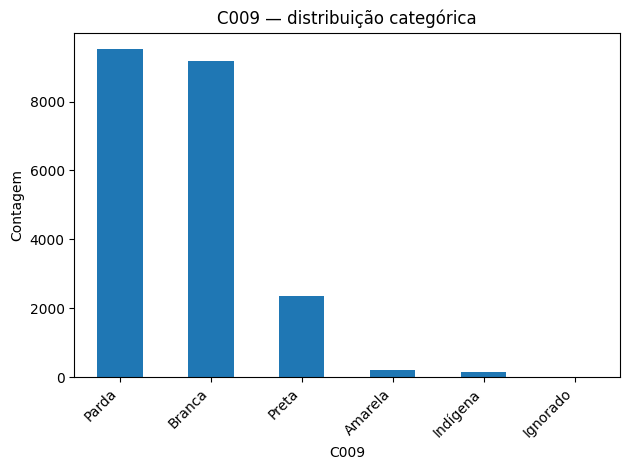

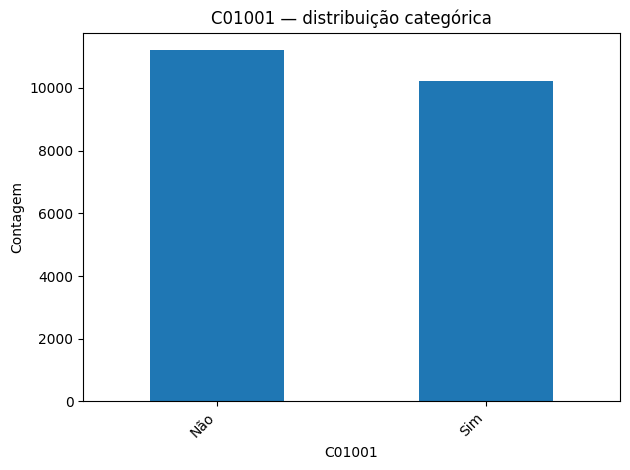

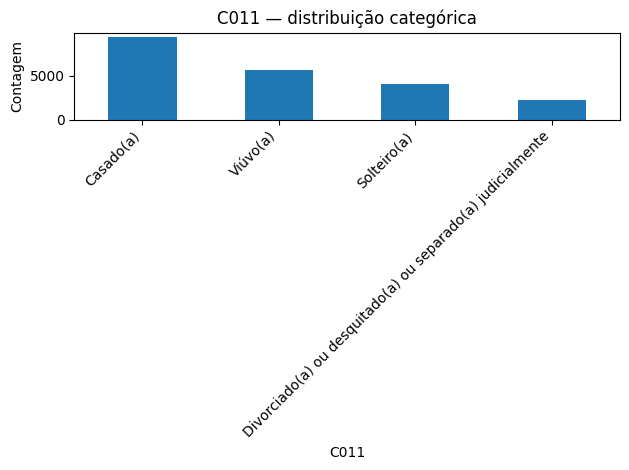

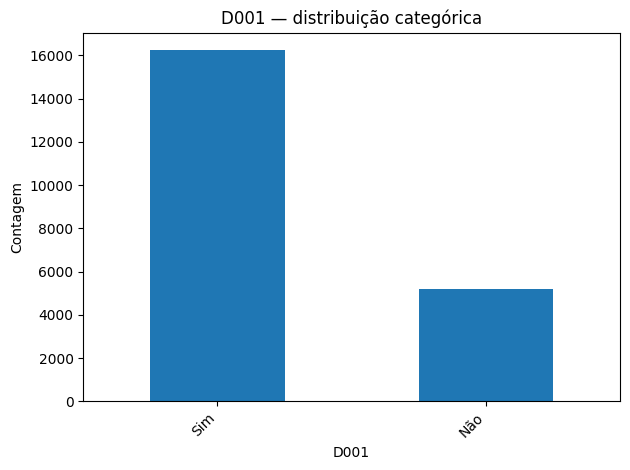

/tmp/ipython-input-2003943108.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  pd.api.types.is_categorical_dtype(s) or


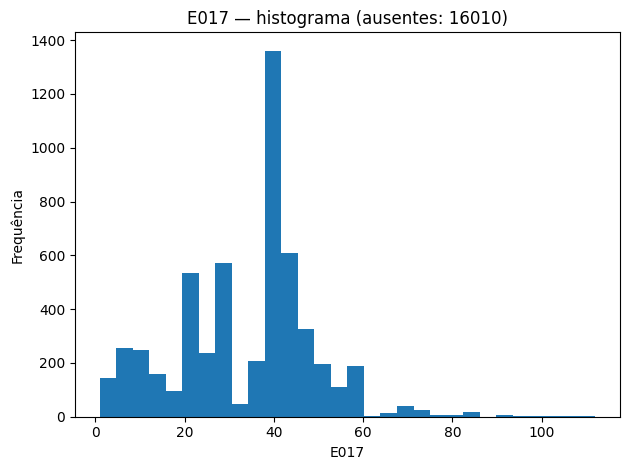

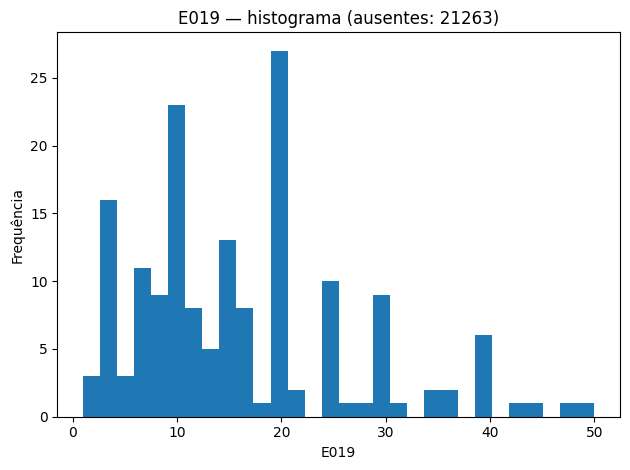

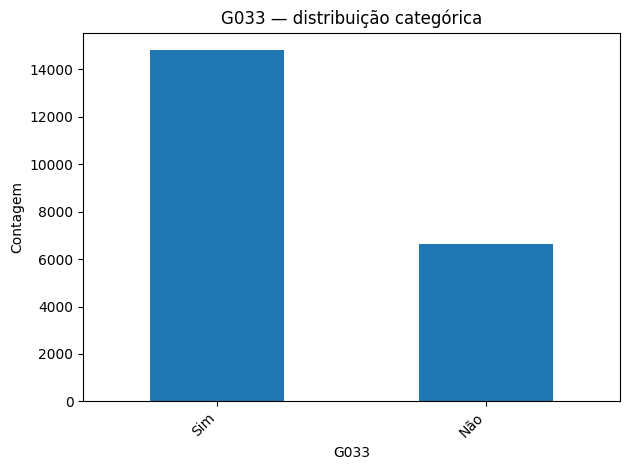

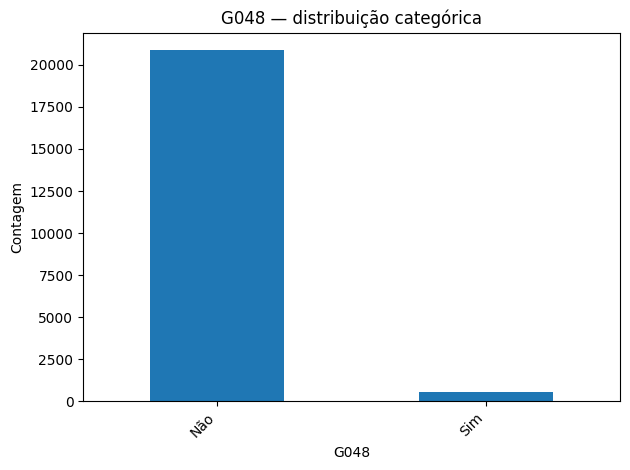

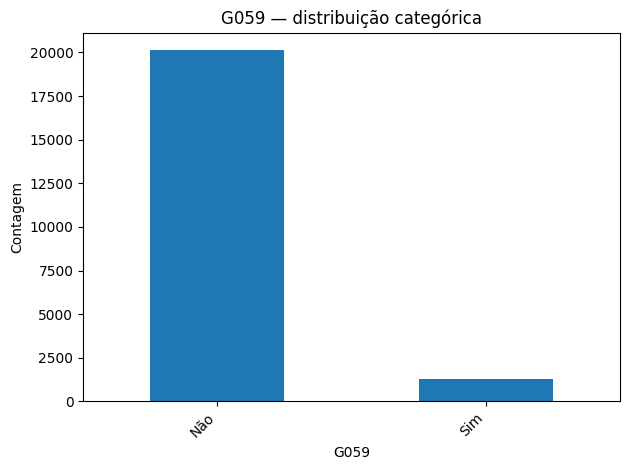

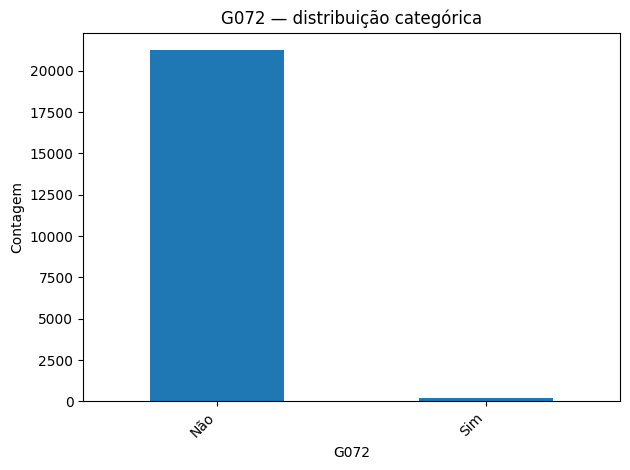

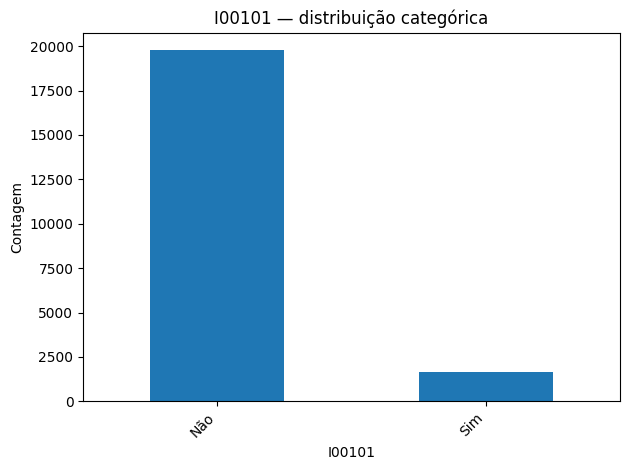

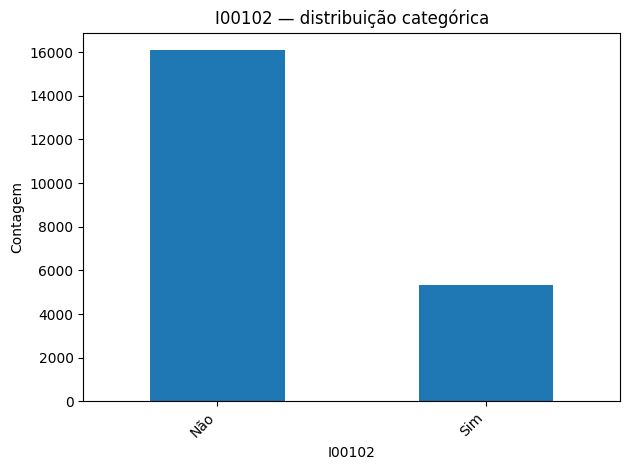

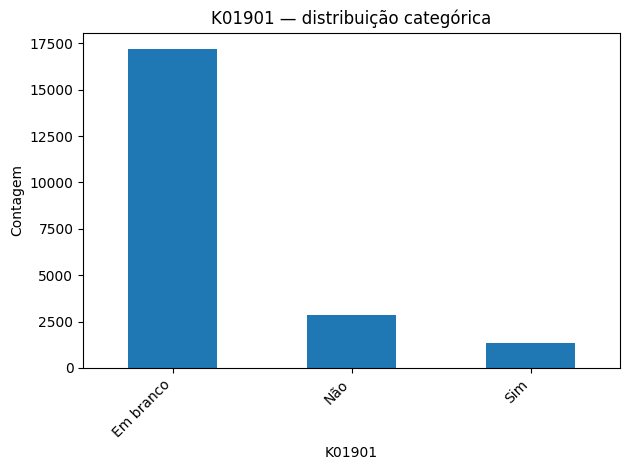

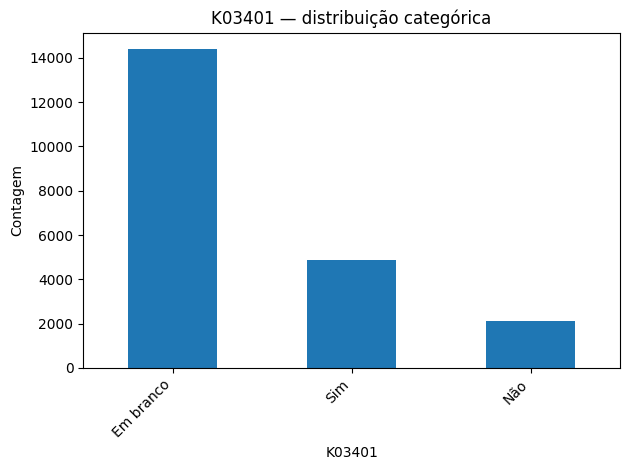

/tmp/ipython-input-2003943108.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  pd.api.types.is_categorical_dtype(s) or


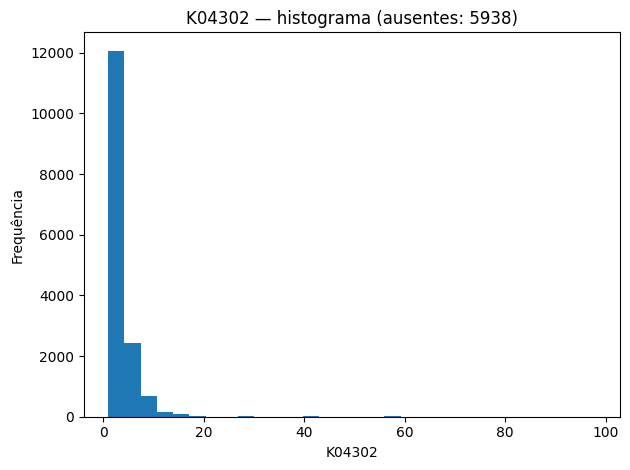

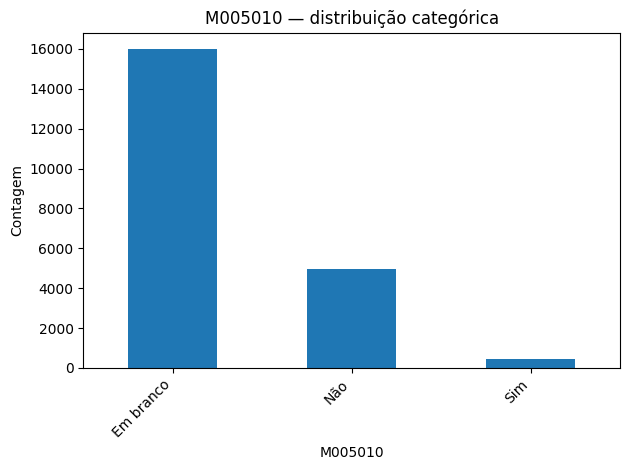

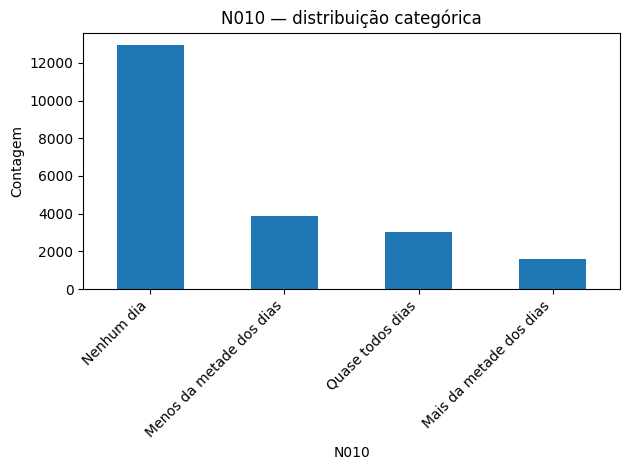

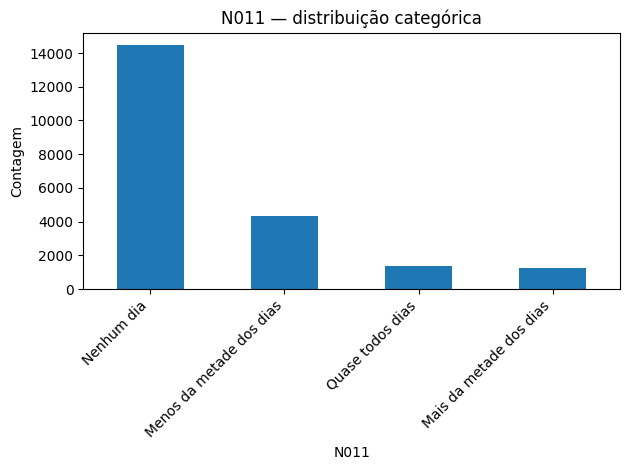

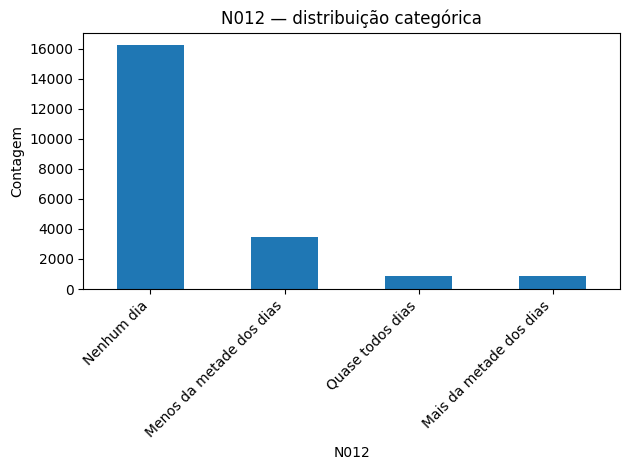

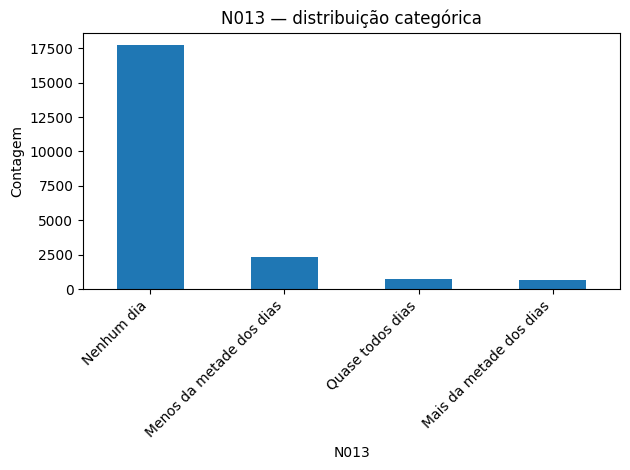

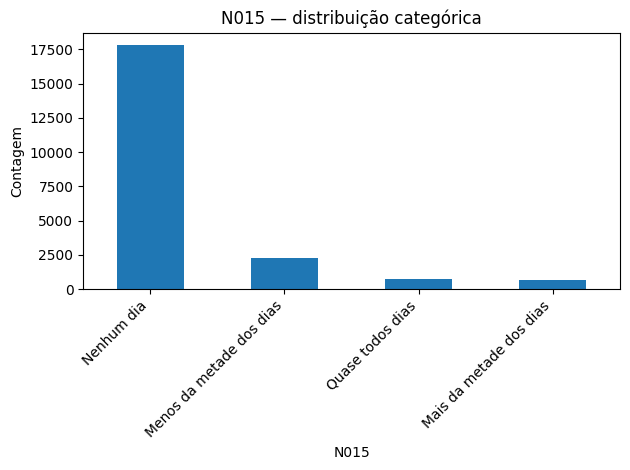

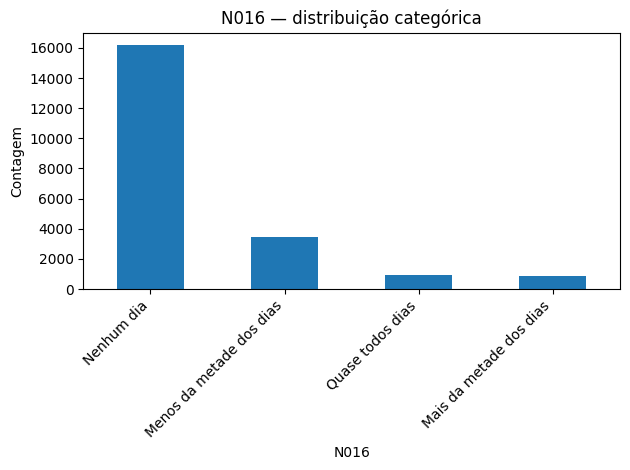

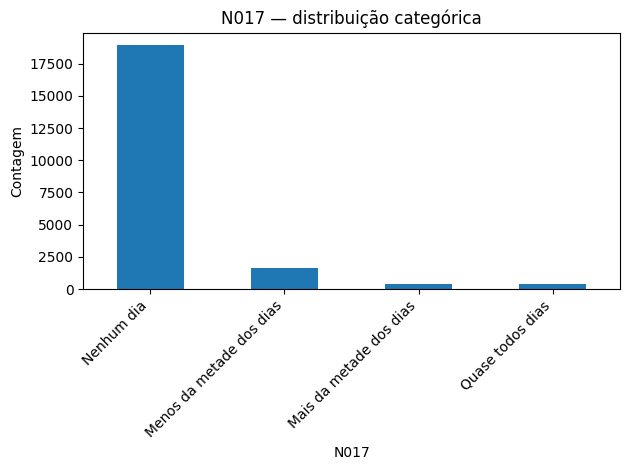

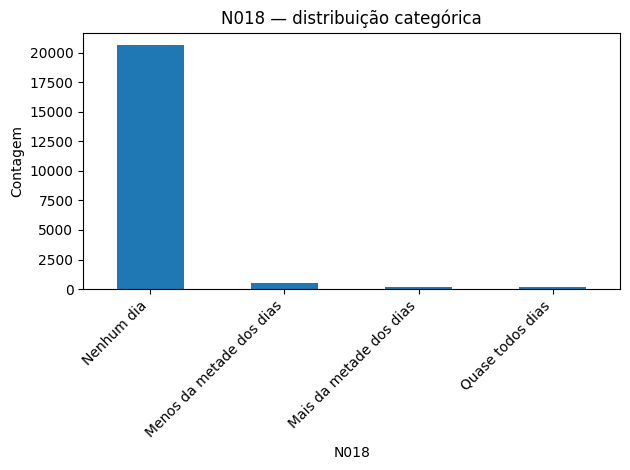

/tmp/ipython-input-2003943108.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  pd.api.types.is_categorical_dtype(s) or


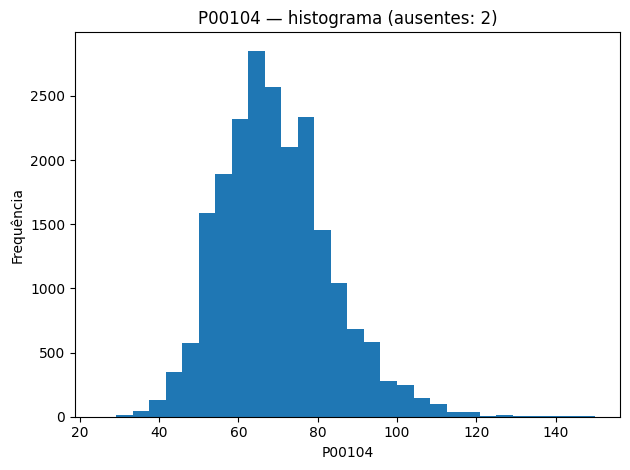

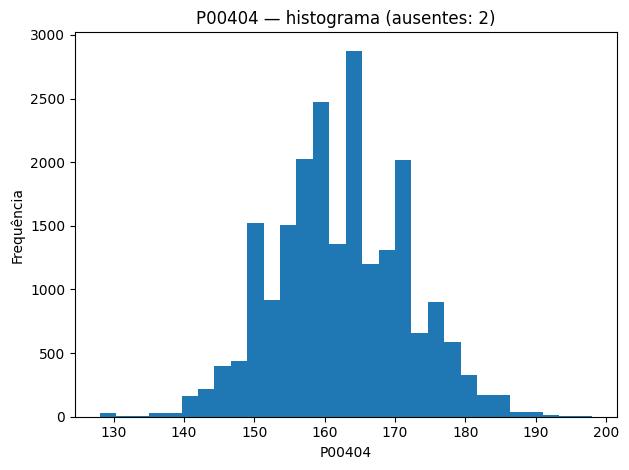

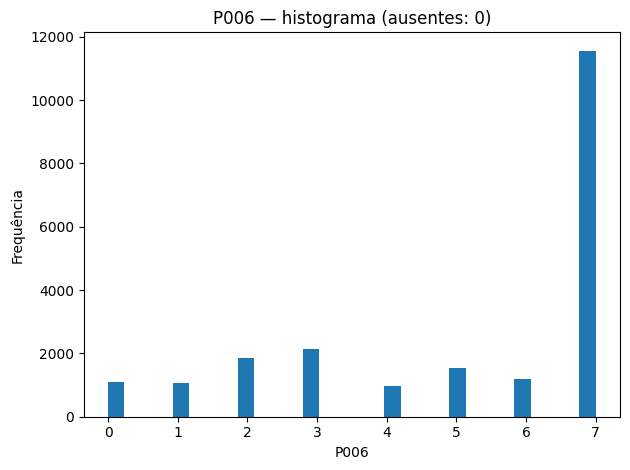

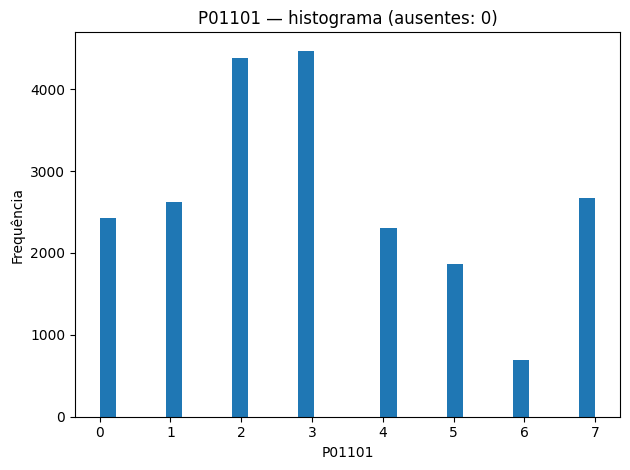

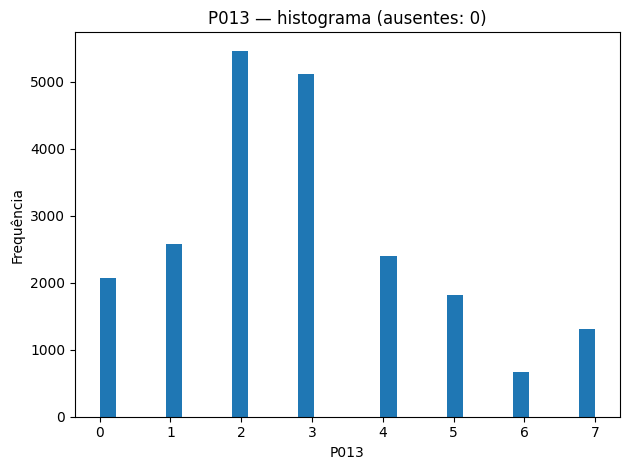

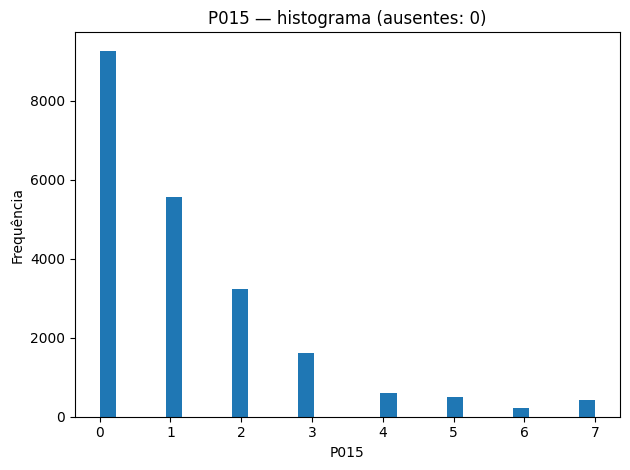

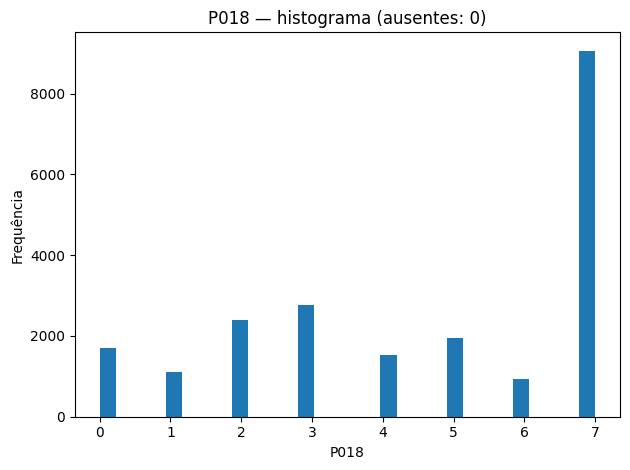

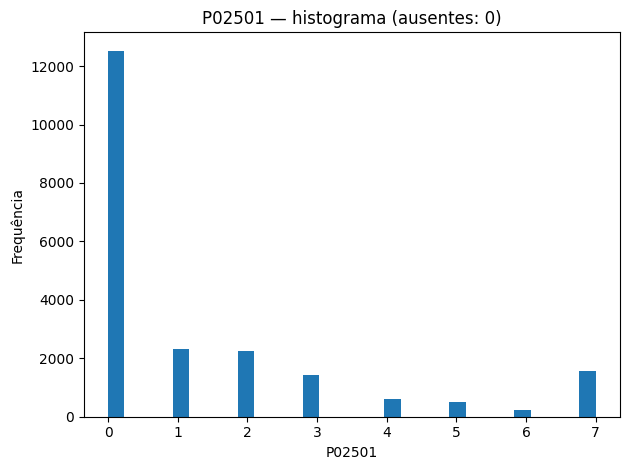

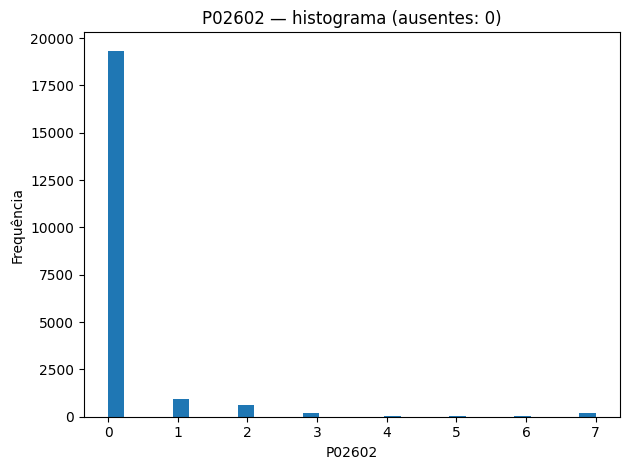

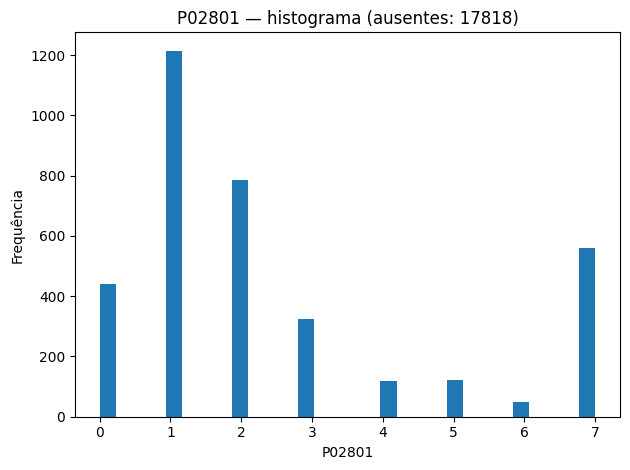

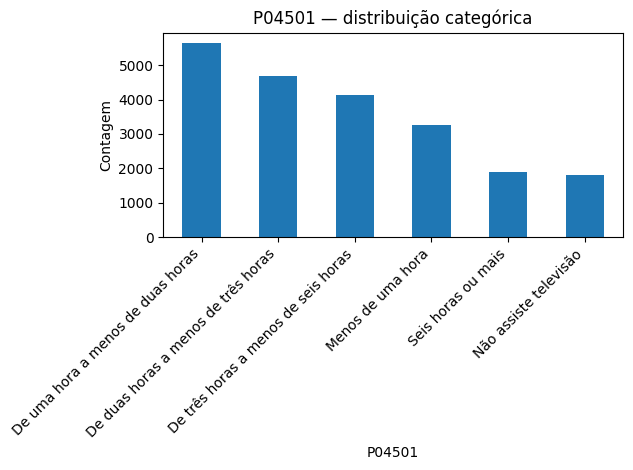

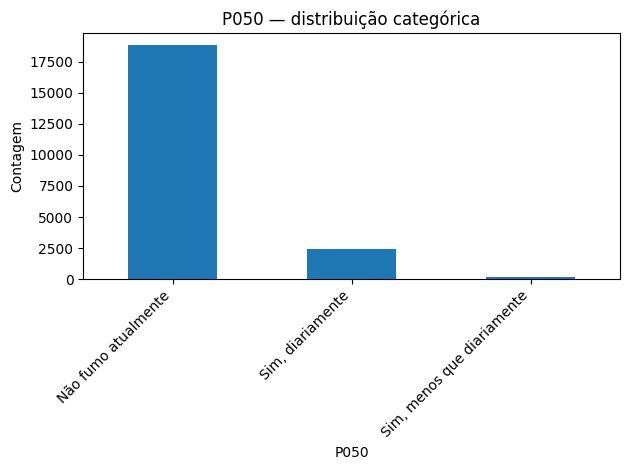

/tmp/ipython-input-2003943108.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  pd.api.types.is_categorical_dtype(s) or


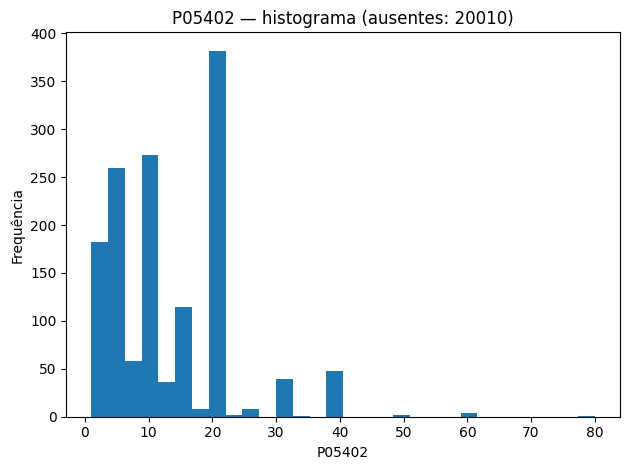

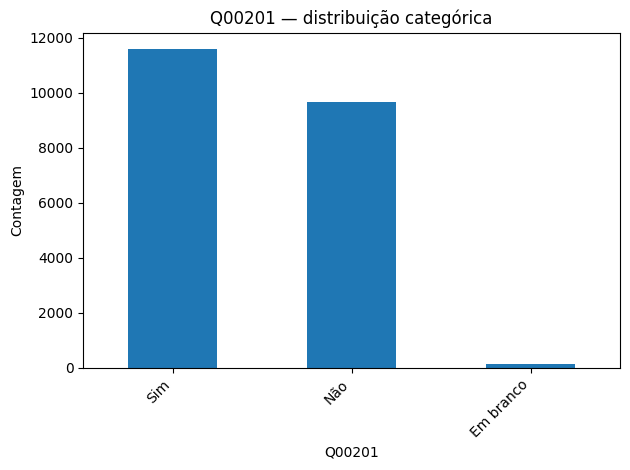

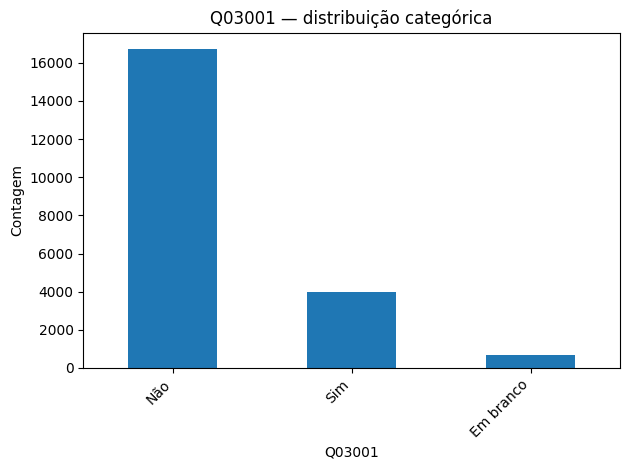

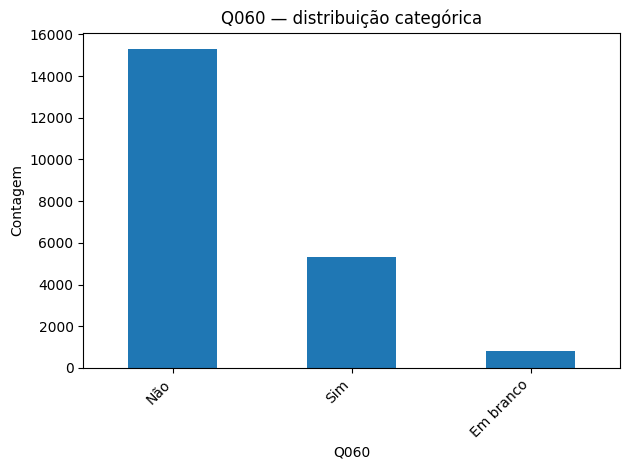

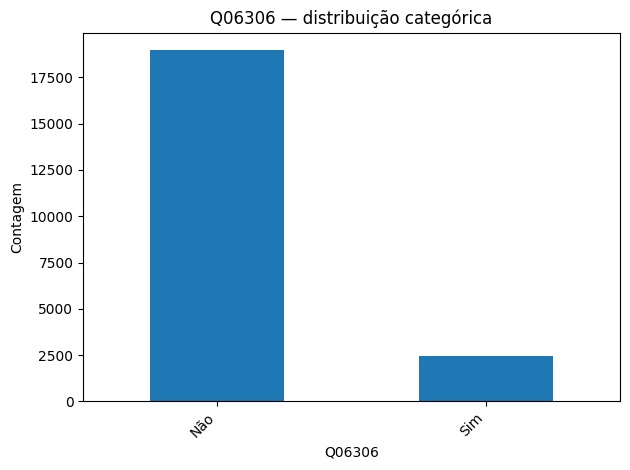

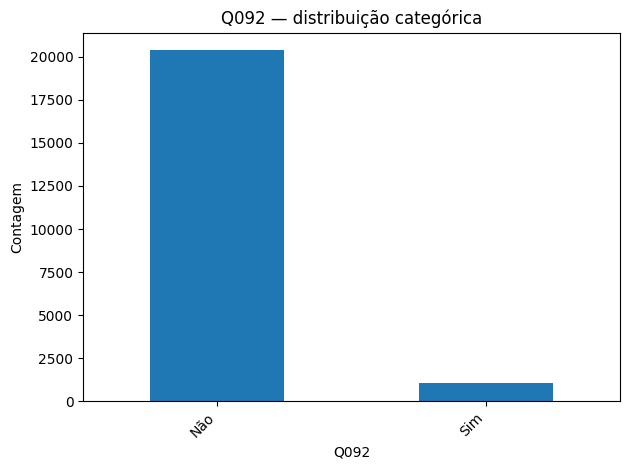

/tmp/ipython-input-2003943108.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  pd.api.types.is_categorical_dtype(s) or


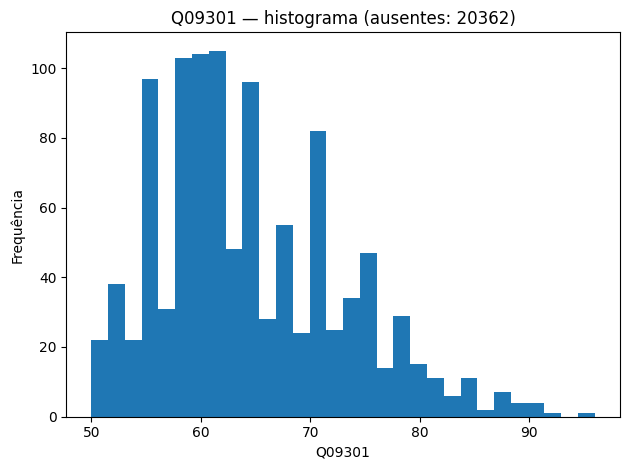

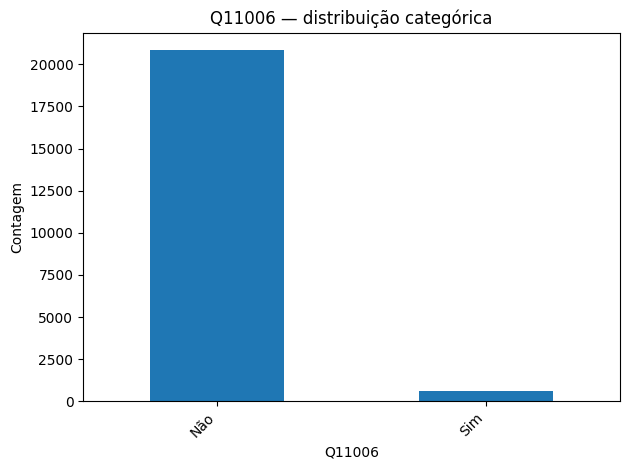

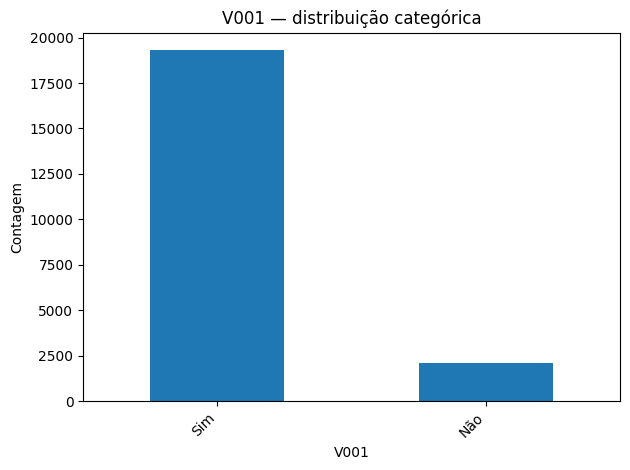

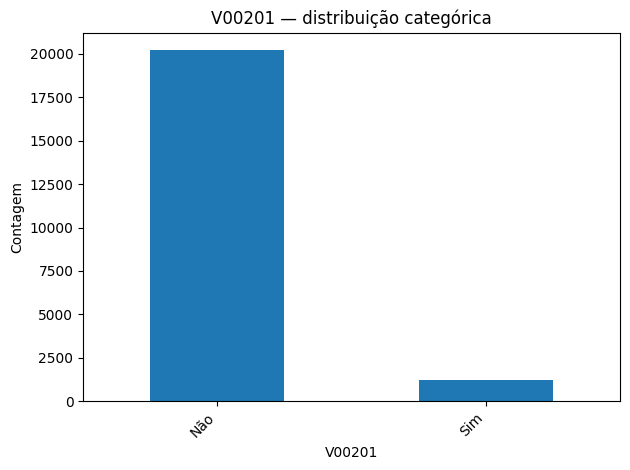

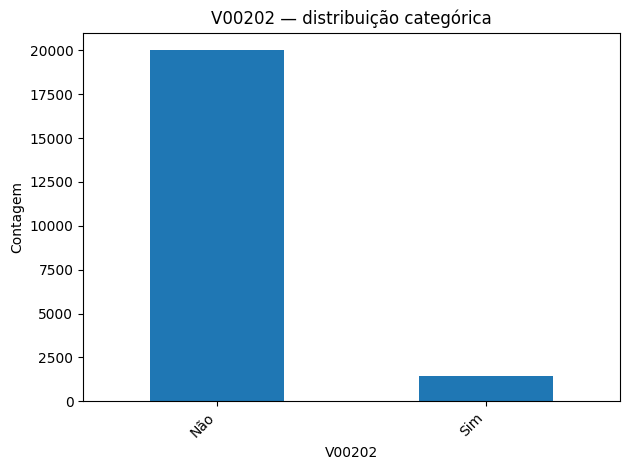

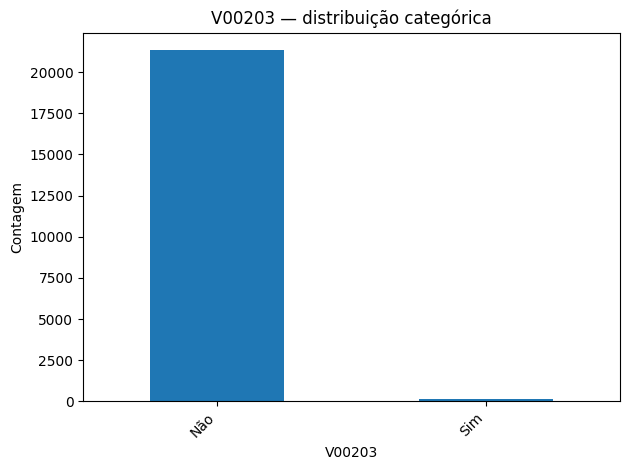

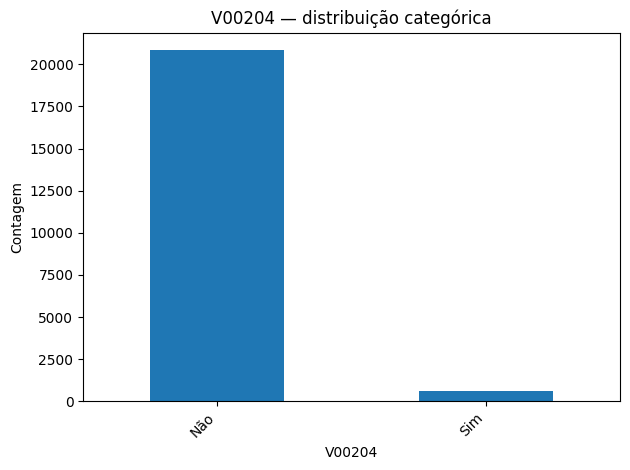

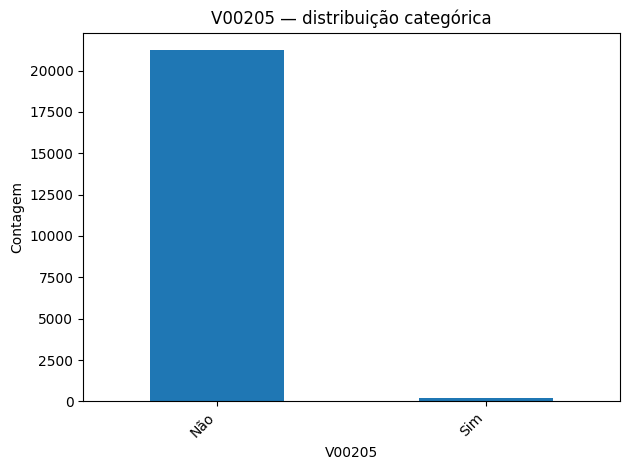

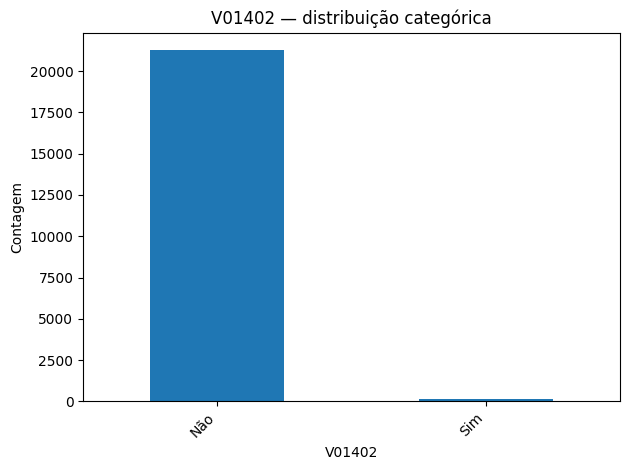

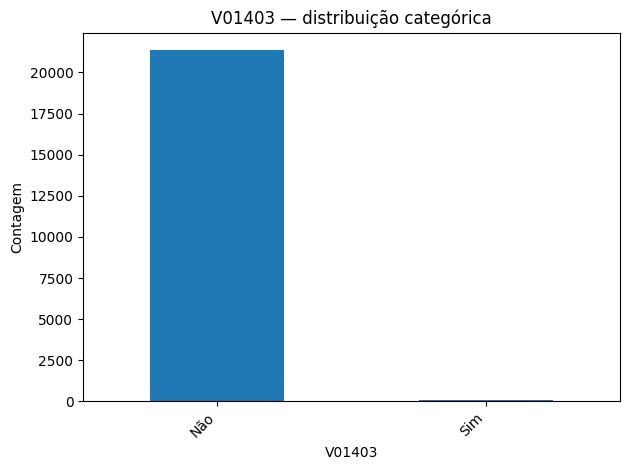

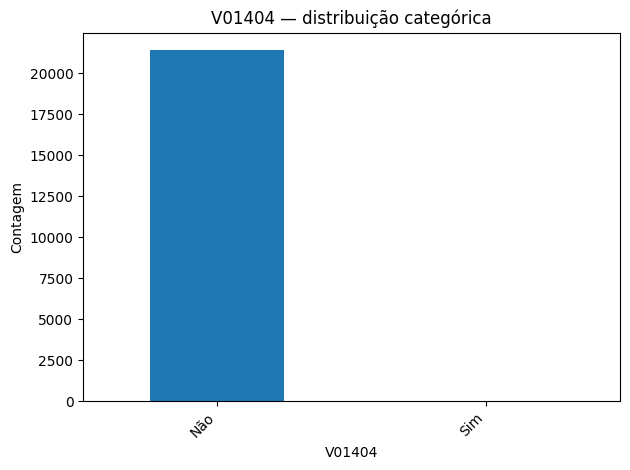

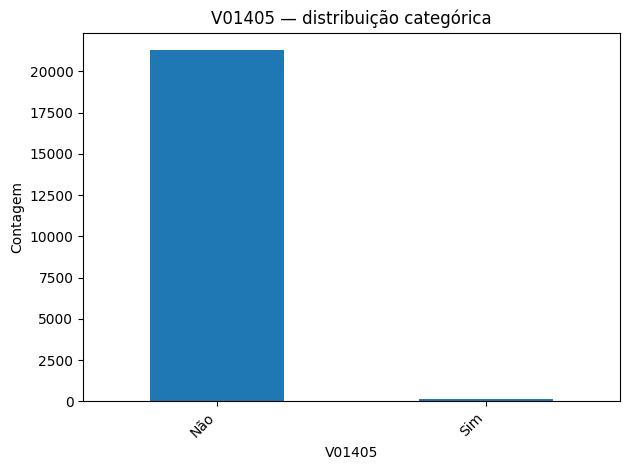

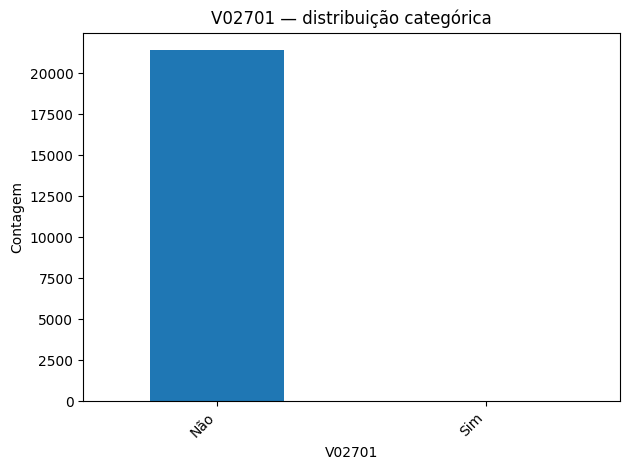

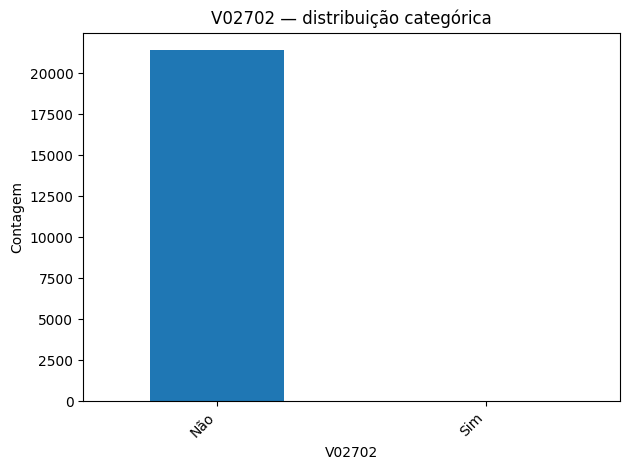

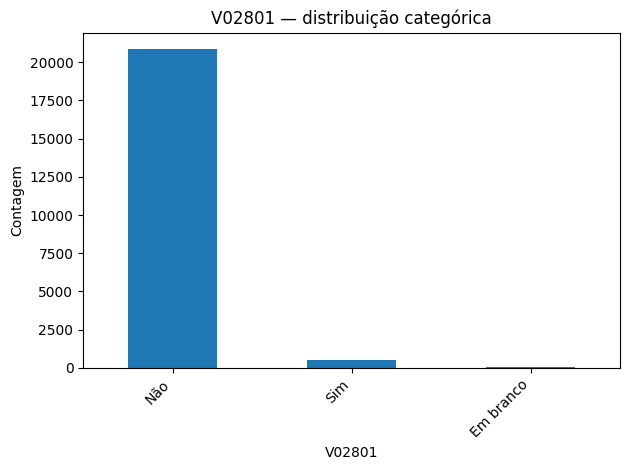

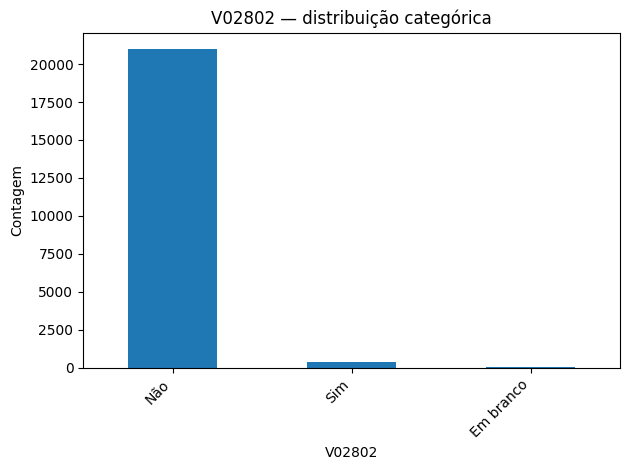

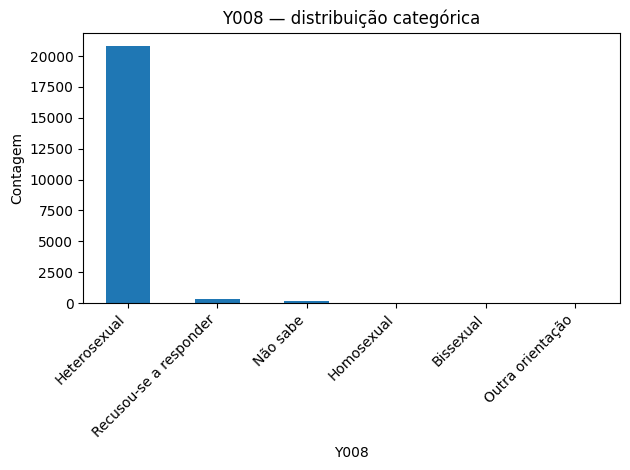

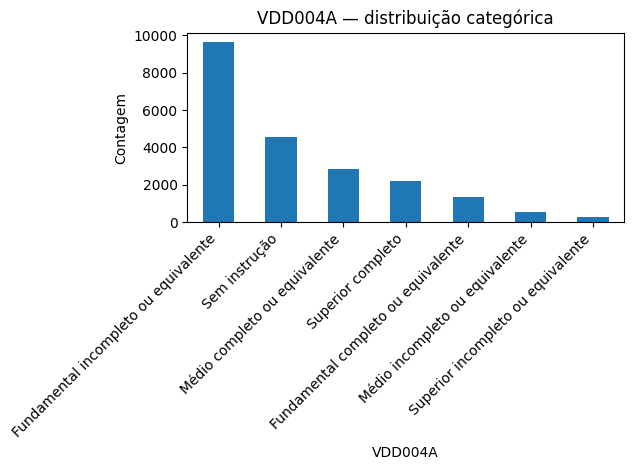

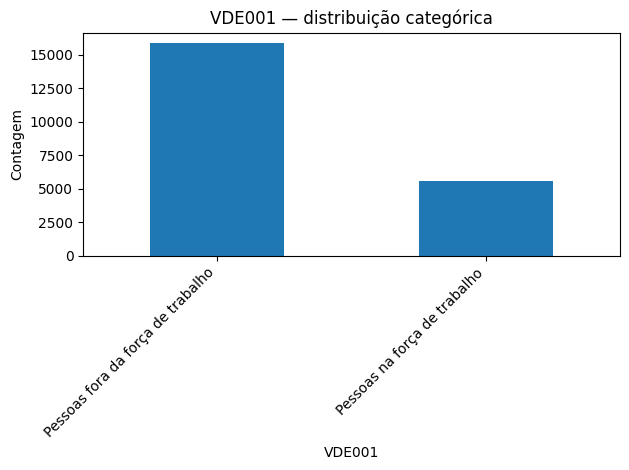

/tmp/ipython-input-2003943108.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  pd.api.types.is_categorical_dtype(s) or


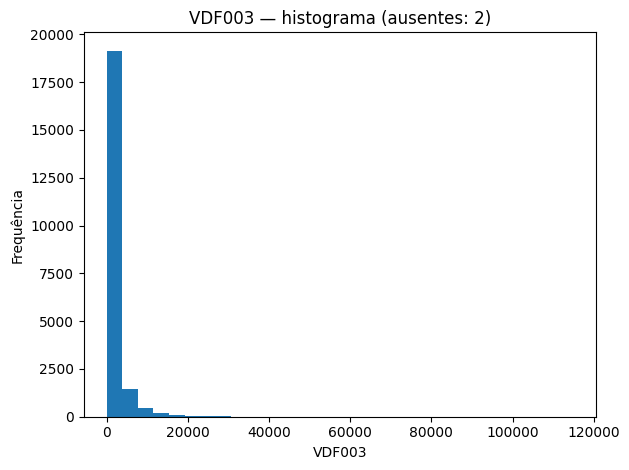

In [ ]:
def is_categorical_like(s: pd.Series) -> bool:
    return (s.dtype == "O" or
            pd.api.types.is_string_dtype(s) or
            pd.api.types.is_categorical_dtype(s) or
            pd.api.types.is_bool_dtype(s))

for col in df_norm.columns:
    s = df_norm[col]
    plt.figure()
    if is_categorical_like(s):
        vc = s.fillna("Em branco").value_counts(dropna=False)
        if len(vc) > MAX_CATS_PLOT:
            vc = vc.head(MAX_CATS_PLOT)
            title_extra = f" (top {len(vc)}/{s.nunique(dropna=False)})"
        else:
            title_extra = ""
        vc.plot(kind="bar")
        plt.ylabel("Contagem")
        plt.xlabel(col)
        plt.title(f"{col} — distribuição categórica{title_extra}")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()
    else:
        s_numeric = pd.to_numeric(s, errors="coerce")
        n_miss = s_numeric.isna().sum()
        s_numeric = s_numeric.dropna()
        plt.hist(s_numeric, bins=NUM_BINS)
        plt.xlabel(col)
        plt.ylabel("Frequência")
        plt.title(f"{col} — histograma (ausentes: {n_miss})")
        plt.tight_layout()
        plt.show()
